In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-white')
sns.set_style('white')

## Building a DataFrame in Pandas

Similar to a familiar Excel spreadsheet or Google Sheet, a Pandas DataFrame is an array made up of rows and columns.  We can create lists of data before and generate a Dataframe from this.  Additionally, we will see how to read data into a notebook and generate a DataFrame from this file.  From here, we explore a variety of ways to visualize the relationships between variables.

In [2]:
temp = [89, 72, 93, 84, 81, 75, 70, 82, 69, 83, 80, 83, 81, 84, 76]
chirps = [20, 16, 20, 18, 17, 16, 15, 17, 15, 16, 15, 17, 16, 17, 14]
len(chirps), len(temp)

(15, 15)

In [3]:
df = pd.DataFrame({'Temperature': temp,
                  'Chirps': chirps})

In [4]:
df.head()

,Chirps,Temperature
0,20,89
1,16,72
2,20,93
3,18,84
4,17,81


In [5]:
df.plot('Temperature', 'Chirps', kind = 'scatter')

<IPython.core.display.Javascript object>

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

We can just the same use matplotlib's functionality to generate a scatterplot.

In [6]:
plt.figure(figsize = (10,8))
plt.scatter(df['Chirps'], df['Temperature'], s=100, alpha = 0.8)

<IPython.core.display.Javascript object>

### Seaborn Plots

In [7]:
import seaborn as sns

In [8]:
plt.figure(figsize = (10,8))
sns.regplot(df['Temperature'], df['Chirps'])

<IPython.core.display.Javascript object>

In [9]:
fit = np.polyfit(df['Temperature'], df['Chirps'], 1)

In [10]:
fit

array([ 0.21179823, -0.37209793])

In [11]:
year = np.arange(1996, 2006)
amount = [444.5, 460.1, 533.9, 561.7, 599.2, 654.2, 706.3, 751.0, 802.7, 864.4]

In [12]:
np.polyfit(year, amount, 1)

array([  4.69793939e+01,  -9.33444776e+04])

In [13]:
df2 = pd.DataFrame({'Year': year, 
                   'Amount': amount})

In [14]:
plt.figure()
sns.regplot(df2['Year'], df2['Amount'])

<IPython.core.display.Javascript object>

iopub message rate exceeded.  The
                    notebook server will temporarily stop sending iopub
                    messages to the client in order to avoid crashing it.
                    To change this limit, set the config variable
                    `--NotebookApp.iopub_msg_rate_limit`.

iopub message rate exceeded.  The
                    notebook server will temporarily stop sending iopub
                    messages to the client in order to avoid crashing it.
                    To change this limit, set the config variable
                    `--NotebookApp.iopub_msg_rate_limit`.

In [15]:
a = np.polyfit(df2['Year'], df2['Amount'], 1)
b = np.polyval(a, 2010)
a, b

In [16]:
sns.jointplot(df2['Year'], df2['Amount'], alpha = 0.4)

In [67]:
temp = [0.0, 4, 10, 15.0, 21, 29, 36, 51, 68]
solubility = [66.7, 71.0, 76.3, 80.6, 85.7, 92.9, 99.4, 113.6, 125.1]

In [68]:
a = np.polyfit(temp, solubility, 1)
a

array([  0.87064039,  67.5077942 ])

In [69]:
alpha, beta, r_value, p_value, std_err = stats.linregress(temp, solubility) #
alpha, beta, r_value

(0.87064039408867, 67.507794198139024, 0.99895493473381314)

<IPython.core.display.Javascript object>


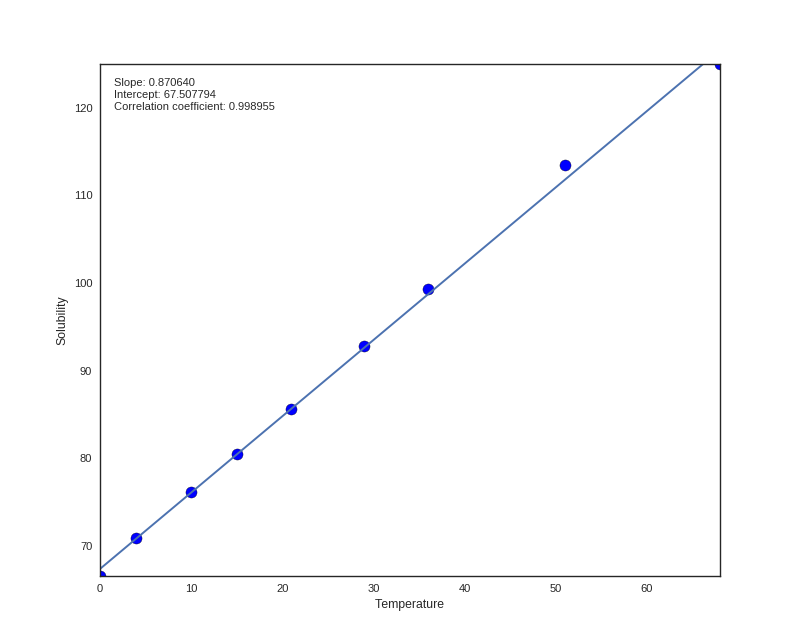

In [70]:
fig = plt.figure(figsize=(10,8))
plt.scatter(temp, solubility, s = 100)
ax = fig.add_subplot(111)
text_string = "Slope: %f" % (alpha)
text_string += "\nIntercept: %f" % (beta)
text_string += "\nCorrelation coefficient: %f" % (r_value)
ax.text(0.022, 0.972, text_string, transform=ax.transAxes, verticalalignment='top',  fontsize=10)

In [71]:
plt.xlabel('Temperature')
plt.ylabel('Solubility')

    for spine in plt.gca().spines.values():
        spine.set_visible(False)

In [72]:
temps = np.arange(0,80)
line = alpha*temps + beta

In [73]:
plt.plot(temps, line)
plt.xlim(min(temp),max(temp))
plt.ylim(min(solubility), max(solubility))

(66.7, 125.1)

### Non-Linear Functions

Plotting and fitting non-linear functions follows a similar pattern.  We will approach the problems in a similar manner to what we have earlier, forming lists based on given data.  Then, we can perform arithmetic on these lists to create and plot new lists.

| Decade $t$ | Year | Population |
| ----- | ------ | ----- |
| 0 | 1780 | 2.8 | 
| 1 | 1790 | 3.9 | 
| 2 | 1800 | 5.3 | 
| 3 | 1810 | 7.2 |

In [74]:
t = np.arange(0,13)
year = np.arange(1780,1910,10)
P = [2.8, 3.9, 5.3, 7.2, 9.6, 12.9, 17.1, 23.2, 31.4, 39.8, 50.2, 62.9, 76.0]

In [75]:
year

array([1780, 1790, 1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880,
       1890, 1900])

<IPython.core.display.Javascript object>


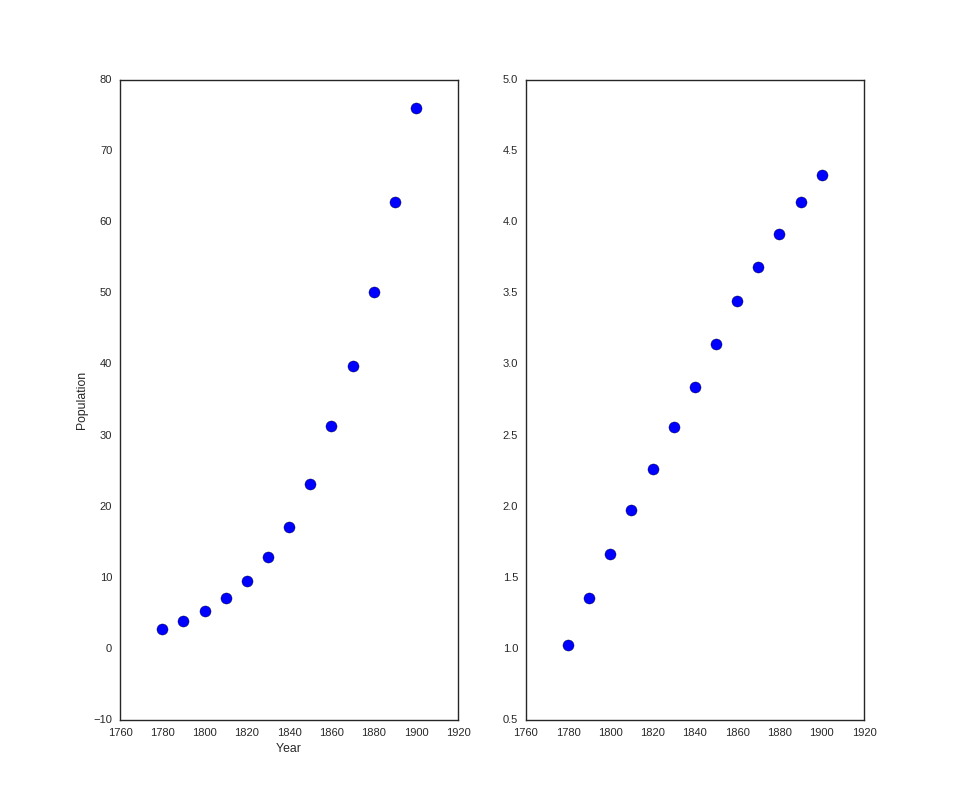

In [76]:
plt.figure(figsize = (12,10))
plt.subplot(1, 2, 1)
plt.scatter(year, P,s = 100)
plt.xlabel('Year')
plt.ylabel('Population')

plt.subplot(1, 2, 2)
lnP = np.log(P)
plt.scatter(year, lnP, s = 100)

In [77]:
line = np.polyfit(year, lnP, 1)
fit = np.polyval(line, year)
alpha, beta, r_value, p_value, std_err = stats.linregress(year, lnP) #
alpha, beta, r_value

(0.027906119028040695, -48.550830218916865, 0.998156911498427)

<IPython.core.display.Javascript object>


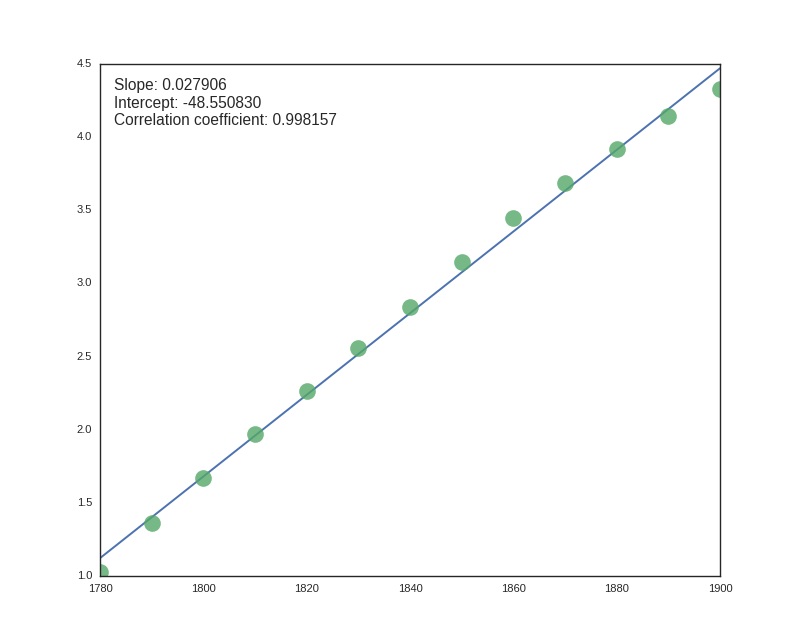

In [78]:
fig = plt.figure(figsize = (10,8))
plt.plot(year, fit)
plt.plot(year, lnP, 'o', markersize = 15, alpha = 0.8)
ax = fig.add_subplot(111)
text_string = "Slope: %f" % (alpha)
text_string += "\nIntercept: %f" % (beta)
text_string += "\nCorrelation coefficient: %f" % (r_value)
ax.text(0.022, 0.972, text_string, transform=ax.transAxes, verticalalignment='top',  fontsize=14)

### Loading Data and Examining Relationships

In [29]:
from sklearn import datasets
iris = datasets.load_iris()

In [30]:
df3 = pd.read_csv('iris.csv')
df3.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,I. setosa
1,4.9,3.0,1.4,0.2,I. setosa
2,4.7,3.2,1.3,0.2,I. setosa
3,4.6,3.1,1.5,0.2,I. setosa
4,5.0,3.6,1.4,0.2,I. setosa


In [31]:
df3.plot.scatter('Sepal length', 'Sepal width', c = 'Petal length', s = 100, colormap = 'viridis')

<IPython.core.display.Javascript object>

iopub message rate exceeded.  The
                    notebook server will temporarily stop sending iopub
                    messages to the client in order to avoid crashing it.
                    To change this limit, set the config variable
                    `--NotebookApp.iopub_msg_rate_limit`.

In [32]:
import statsmodels.api as sm

In [33]:
plt.figure(figsize = (10,8))
plt.subplot(1, 3, 1)
plt.scatter(df3['Sepal length'], df3['Sepal width'])

plt.subplot(1, 3, 2)
plt.scatter(df3['Sepal width'], df3['Petal length'])

plt.subplot(1, 3, 3)
plt.scatter(df3['Petal length'], df3['Petal width'])

<IPython.core.display.Javascript object>

In [34]:
df3.plot.box()

<IPython.core.display.Javascript object>

In [35]:
df3.plot.hist(alpha=0.5);

<IPython.core.display.Javascript object>

iopub message rate exceeded.  The
                    notebook server will temporarily stop sending iopub
                    messages to the client in order to avoid crashing it.
                    To change this limit, set the config variable
                    `--NotebookApp.iopub_msg_rate_limit`.

In [36]:
df3.plot.kde();

In [37]:
pd.tools.plotting.scatter_matrix(df3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe529e24150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe527689b50>]], dtype=object)

In [38]:
plt.figure(figsize = (10,8))
pd.tools.plotting.parallel_coordinates(df3, 'Species' )

<IPython.core.display.Javascript object>

In [39]:
sns.jointplot(df3['Petal width'], df3['Petal length'], s = 100, alpha = 0.4)

<IPython.core.display.Javascript object>

iopub message rate exceeded.  The
                    notebook server will temporarily stop sending iopub
                    messages to the client in order to avoid crashing it.
                    To change this limit, set the config variable
                    `--NotebookApp.iopub_msg_rate_limit`.

In [40]:
np.random.seed(1111)

iopub message rate exceeded.  The
                    notebook server will temporarily stop sending iopub
                    messages to the client in order to avoid crashing it.
                    To change this limit, set the config variable
                    `--NotebookApp.iopub_msg_rate_limit`.

In [41]:
s1 = pd.Series(np.random.normal(0,10,1000), name = 's1')
s2 = pd.Series(1.3*s1 + np.random.normal(40,10,1000), name = 's2')

In [42]:
plt.figure()
plt.hist(s1, alpha = 0.4, bins = np.arange(-50,150,5))
plt.hist(s2, alpha = 0.4, bins = np.arange(-50,150,5))

In [43]:
sns.jointplot(s1, s2, kind='hex')

In [44]:
sns.jointplot(s1, s2, kind='kde', space=0);

In [45]:
a = [i**2 for i in range(1, 10)]
b = [i**3 for i in range(1, 10)]
plt.figure()
plt.plot(a, '-o')
plt.plot(b, '-o')

<IPython.core.display.Javascript object>

In [46]:
lna = np.log(a)
lnb = np.log(b)
i = [i for i in range(1,10)]
plt.figure()
plt.plot(np.log(i),lna, '-o')
plt.plot(np.log(i),lnb, '-o')

/projects/sage/sage-7.5/local/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>

iopub message rate exceeded.  The
                    notebook server will temporarily stop sending iopub
                    messages to the client in order to avoid crashing it.
                    To change this limit, set the config variable
                    `--NotebookApp.iopub_msg_rate_limit`.

![](ex5.png)

In [49]:
yr = [1940, 1950, 1960, 1970, 1980, 1990, 2000]
men = [10.2, 10.2, 10, 9.95, 9.95, 9.9, 9.84]
women = [11.6, 11.5, 11.3, 11, 10.88, 10.49, 10.49]

<IPython.core.display.Javascript object>


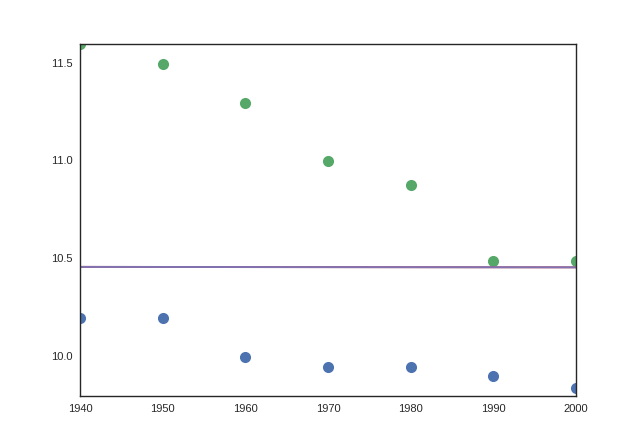

In [55]:
plt.figure()
plt.plot(yr, men, 'o', markersize=10)
plt.plot(yr, women, 'o', markersize=10)

In [56]:
np.polyfit(yr, men, 1)

array([ -6.17857143e-03,   2.21775000e+01])

In [57]:
np.polyfit(yr, women, 1)

array([ -2.06071429e-02,   5.16332143e+01])

In [58]:
stats.linregress(yr, men)

LinregressResult(slope=-0.006178571428571417, intercept=22.177499999999977, rvalue=-0.94233512624200566, pvalue=0.0014865596581912022, stderr=0.000981330833145292)

In [59]:
stats.linregress(yr, women)

LinregressResult(slope=-0.020607142857142845, intercept=51.63321428571426, rvalue=-0.98523284743968365, pvalue=5.0495347642577862e-05, stderr=0.0016015776660556274)

In [62]:
yrs = np.linspace(1940,2000, 10000)

In [63]:
fitm = -0.006*yrs + 22.17

In [65]:
plt.plot(fitm)
plt.xlim(1940,2000)

(1940, 2000)